In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=columns)

In [3]:
iris_df = iris_df.drop('class', axis=1)

In [4]:
data = iris_df.values

In [5]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [6]:
def kmeans_clustering(data, k, iterations):
    # Step 1: Randomly initialize the centroids (cluster means) by choosing k random points from the dataset
    centroids = data[random.sample(range(data.shape[0]), k)]
    
    for _ in range(iterations):
        # Step 2: Assign each data point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_idx = np.argmin(distances)
            clusters[closest_centroid_idx].append(point)
        
        # Step 3: Update the centroids (mean of points in each cluster)
        for i in range(k):
            if clusters[i]:  # Avoid division by zero in case a cluster is empty
                centroids[i] = np.mean(clusters[i], axis=0)
    
    # Return the final centroids after iterations
    return centroids, clusters

In [7]:
k = 4
iterations = 10

In [10]:
final_centroids, final_clusters = kmeans_clustering(data, k, iterations)

In [9]:
print("Final Cluster Means (Centroids):")
for i, centroid in enumerate(final_centroids):
    print(f"Cluster {i+1} Mean: {centroid}")

Final Cluster Means (Centroids):
Cluster 1 Mean: [6.9125   3.1      5.846875 2.13125 ]
Cluster 2 Mean: [5.53214286 2.63571429 3.96071429 1.22857143]
Cluster 3 Mean: [6.2525 2.855  4.815  1.625 ]
Cluster 4 Mean: [5.006 3.418 1.464 0.244]


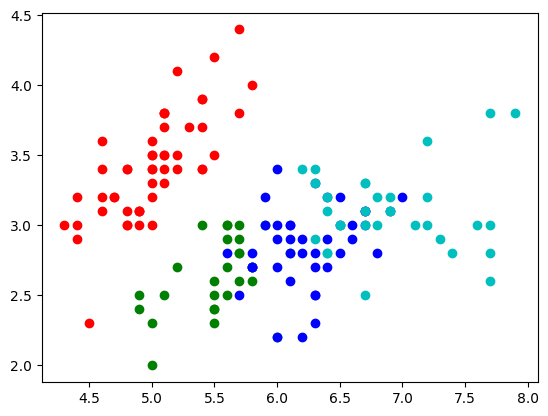

In [11]:
colors = ['r', 'g', 'b', 'c']
for i, cluster in enumerate(final_clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')

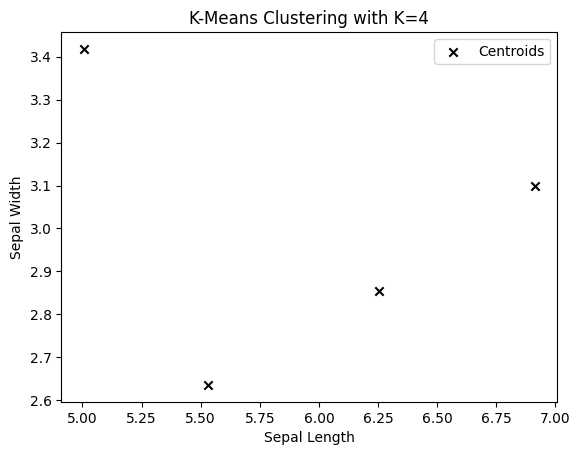

In [12]:
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('K-Means Clustering with K=4')
plt.show()